In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('hr.csv')

# Display the first few rows of the dataframe
print(df.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [14]:
# Assuming 'EmployeeCount', 'Over18', 'StandardHours' are redundant
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)


In [15]:
# Example: Renaming 'DailyRate' to 'Daily_Rate'
df.rename(columns={'DailyRate': 'Daily_Rate'}, inplace=True)


In [17]:
df.drop_duplicates(inplace=True)
# Example: Converting 'OverTime' from 'Yes'/'No' to boolean True/False
df['OverTime'] = df['OverTime'].map({'Yes': True, 'No': False})

df.dropna(inplace=True)


In [18]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Daily_Rate                1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [19]:
from sqlalchemy import create_engine

# MySQL connection details
username = 'Your MySQL username'
password = 'Your MySQL password'
host = 'localhost'
database = 'hrdatabase'

# Create the connection string and engine
connection_string = f"mysql+pymysql://{username}:{password}@{host}/{database}"
engine = create_engine(connection_string)

# Upload the DataFrame to the MySQL table named 'employees'
df.to_sql('employees', con=engine, if_exists='replace', index=False)



1470

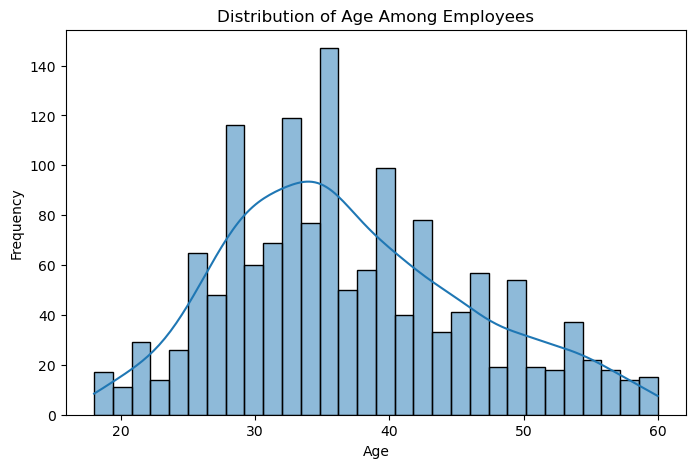

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame after cleaning
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age Among Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


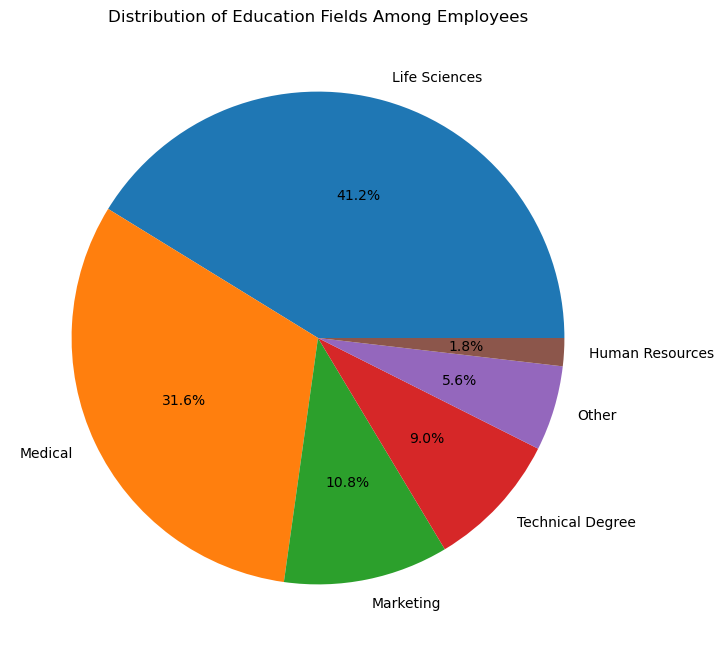

In [22]:
education_field_counts = df['EducationField'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_field_counts, labels=education_field_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Education Fields Among Employees')
plt.show()


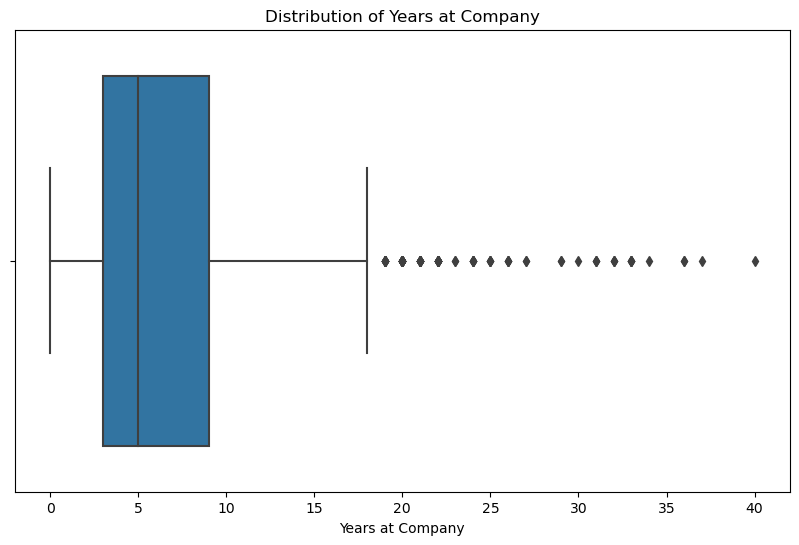

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='YearsAtCompany', data=df)
plt.title('Distribution of Years at Company')
plt.xlabel('Years at Company')
plt.show()


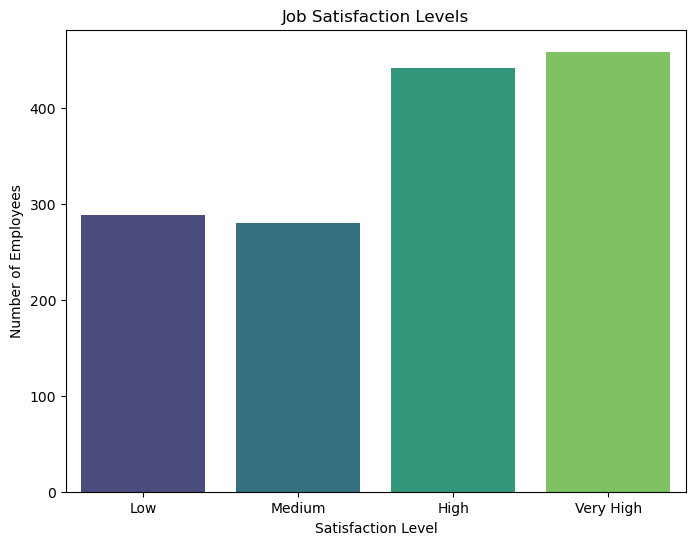

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='JobSatisfaction', data=df, palette='viridis')
plt.title('Job Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Employees')
plt.xticks([0, 1, 2, 3], ['Low', 'Medium', 'High', 'Very High'])
plt.show()


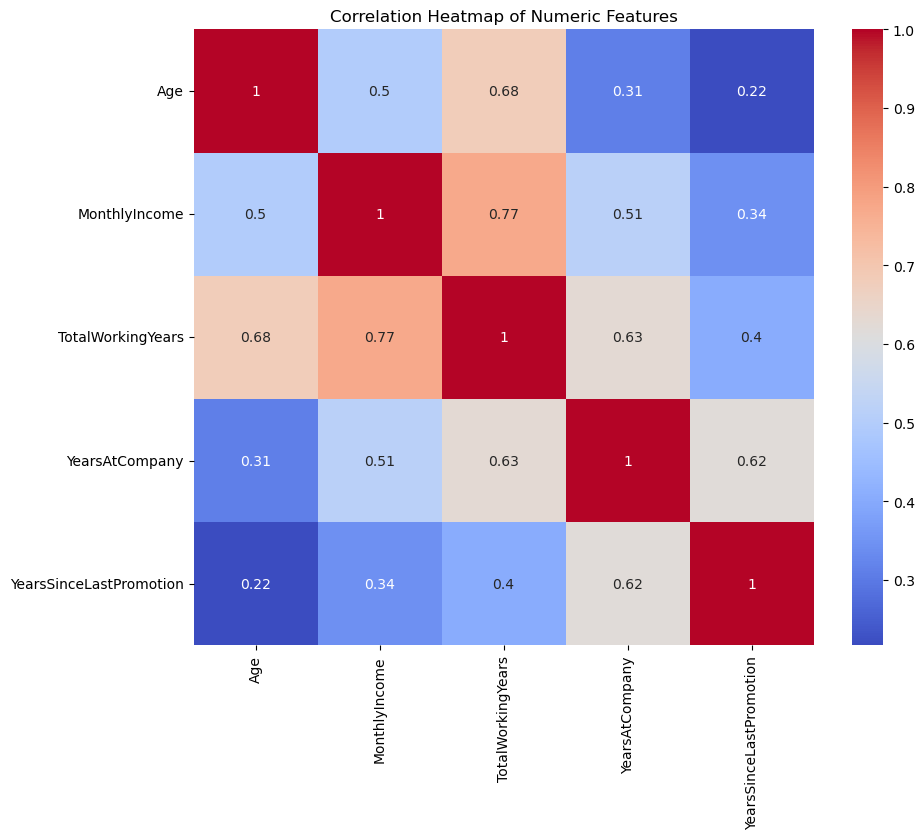

In [25]:
numeric_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


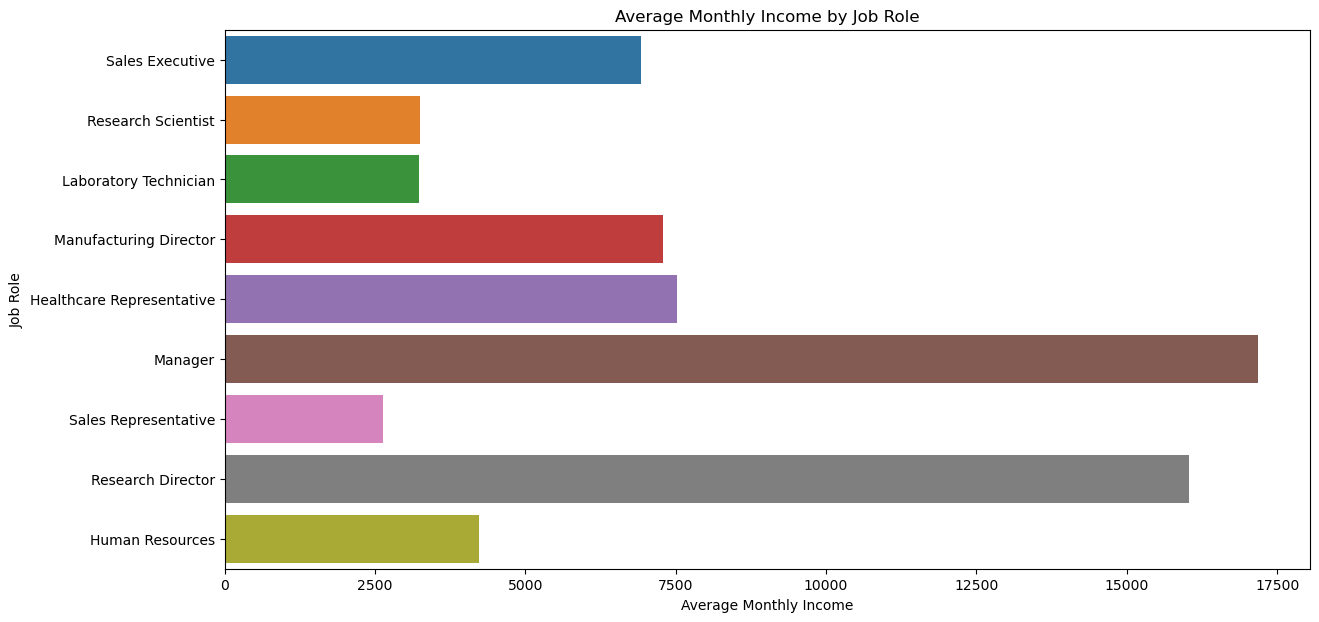

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame after cleaning
plt.figure(figsize=(14, 7))
sns.barplot(x='MonthlyIncome', y='JobRole', data=df, estimator=np.mean, errorbar=None)
plt.title('Average Monthly Income by Job Role')
plt.xlabel('Average Monthly Income')
plt.ylabel('Job Role')
plt.show()

